<a href="https://colab.research.google.com/github/PCANALS/normmal/blob/main/Prueba_Normmal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto para NORMMAL estudio de sesiones de Google Analytics


#### por Pilar Canals de Ros


Configuración proyecto

In [45]:
!pip install google-cloud-bigquery

from google.colab import auth
auth.authenticate_user()

from google.cloud import bigquery
client = bigquery.Client(project='normmal-479616', location='EU')

# Prueba conexión
query = "SELECT 1 as test"
client.query(query).to_dataframe()

,test
0,1


Librerias


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from google.cloud import bigquery
import pandas as pd
import seaborn as sns

Exploración inicial de `google_analytics_sample.ga_sessions`

In [47]:
from google.colab import auth
auth.authenticate_user()
print('Autenticado correctamente')

from google.cloud import bigquery
client = bigquery.Client(project='normmal-479616')

# Verifica datasets públicos accesibles
query = """
SELECT *
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170701`
LIMIT 10
"""


df = client.query(query).to_dataframe()
print(df)

# Información del dataset
print(df.info())
print(df.shape)


Autenticado correctamente
   visitorId  visitNumber     visitId  visitStartTime      date  \
0       <NA>            2  1498921578      1498921578  20170701   
1       <NA>            1  1498934175      1498934175  20170701   
2       <NA>            1  1498950889      1498950889  20170701   
3       <NA>            1  1498939911      1498939911  20170701   
4       <NA>            1  1498945129      1498945129  20170701   
5       <NA>            1  1498950173      1498950173  20170701   
6       <NA>            1  1498946272      1498946272  20170701   
7       <NA>            1  1498942312      1498942312  20170701   
8       <NA>            1  1498943197      1498943197  20170701   
9       <NA>            1  1498945972      1498945972  20170701   

                                              totals  \
0  {'visits': 1, 'hits': 2, 'pageviews': 1, 'time...   
1  {'visits': 1, 'hits': 2, 'pageviews': 1, 'time...   
2  {'visits': 1, 'hits': 2, 'pageviews': 1, 'time...   
3  {'visits'

In [48]:
query1 = """
SELECT *
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*` ga
WHERE _TABLE_SUFFIX BETWEEN '20170701' AND '20170731'
limit 10
        """

data = client.query(query1).to_dataframe()
data.head()

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,clientId,channelGrouping,socialEngagementType
0,<NA>,2,1498921578,1498921578,20170701,"{'visits': 1, 'hits': 2, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'Weste...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 8, 'minut...",9117776942963408674,None,None,Direct,Not Socially Engaged
1,<NA>,1,1498934175,1498934175,20170701,"{'visits': 1, 'hits': 2, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Opera Mini', 'browserVersion': 'n...","{'continent': 'Asia', 'subContinent': 'Southea...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 11, 'minu...",734032105411402836,None,None,Organic Search,Not Socially Engaged
2,<NA>,1,1498950889,1498950889,20170701,"{'visits': 1, 'hits': 2, 'pageviews': 1, 'time...","{'referralPath': '/', 'campaign': '(not set)',...","{'browser': 'Android Webview', 'browserVersion...","{'continent': 'Europe', 'subContinent': 'North...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 16, 'minu...",5696457532157595544,None,None,Social,Not Socially Engaged
3,<NA>,1,1498939911,1498939911,20170701,"{'visits': 1, 'hits': 2, 'pageviews': 1, 'time...","{'referralPath': '/', 'campaign': '(not set)',...","{'browser': 'Firefox', 'browserVersion': 'not ...","{'continent': 'Europe', 'subContinent': 'Weste...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 13, 'minu...",5009259967134102270,None,None,Social,Not Socially Engaged
4,<NA>,1,1498945129,1498945129,20170701,"{'visits': 1, 'hits': 2, 'pageviews': 1, 'time...","{'referralPath': '/', 'campaign': '(not set)',...","{'browser': 'Safari (in-app)', 'browserVersion...","{'continent': 'Europe', 'subContinent': 'Weste...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 14, 'minu...",2881134828551603619,None,None,Social,Not Socially Engaged




*  el campo visitorId	 no se puede utilizar como identificador al tener campos NULL, como ID de visitor se puede utilizar fullVisitorId
*   los campos totals, trafficSource, device, geoNetwork(info de localización), customDimensions(info cliente) y hits tienen formato JSON, y combiene expandirlos


*   totals y hits incluye toda la información relacionada a los principales kpis
*   el resto son dimensiones, necesarias para calculos de detalle e intermedios




Extración de los principales kpis agregados para el mes de Julio de 2017

In [49]:
#de la tabla particionada por totals. se extraen cada kpi, y luego se calculan las sesiones y visitas totals

query_kpis_completa = """
WITH base_data AS (
  -- Pageviews
  SELECT 'pageviews' AS name, totals.pageviews AS value, fullVisitorId, visitId
  FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*` ga
  WHERE _TABLE_SUFFIX BETWEEN '20170701' AND '20170731'
    AND totals.pageviews IS NOT NULL

  UNION ALL
  -- Hits
  SELECT 'hits' AS name, totals.hits AS value, fullVisitorId, visitId
  FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*` ga
  WHERE _TABLE_SUFFIX BETWEEN '20170701' AND '20170731'
    AND totals.hits IS NOT NULL

  UNION ALL
  -- Revenue (microdólares a dólares)
  SELECT 'revenue' AS name, SAFE_DIVIDE(totals.totalTransactionRevenue, 1000000) AS value, fullVisitorId, visitId
  FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*` ga
  WHERE _TABLE_SUFFIX BETWEEN '20170701' AND '20170731'
    AND totals.totalTransactionRevenue IS NOT NULL

  UNION ALL
  -- Bounces
  SELECT 'bounces' AS name, totals.bounces AS value, fullVisitorId, visitId
  FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*` ga
  WHERE _TABLE_SUFFIX BETWEEN '20170701' AND '20170731'
    AND totals.bounces IS NOT NULL

  UNION ALL
  -- Time on Site
  SELECT 'timeOnSite' AS name, totals.timeOnSite AS value, fullVisitorId, visitId
  FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*` ga
  WHERE _TABLE_SUFFIX BETWEEN '20170701' AND '20170731'
    AND totals.timeOnSite IS NOT NULL
),
aggregated AS (
  SELECT
    name,
    SUM(value) AS total,
    COUNT(*) AS count_sesiones,
    COUNT(DISTINCT fullVisitorId) AS visitantes_unicos,
    COUNT(DISTINCT CONCAT(fullVisitorId, CAST(visitId AS STRING))) AS sesiones_unicas
  FROM base_data
  GROUP BY name
)

SELECT
  name,
  ROUND(total, 2) AS total,
  count_sesiones,
  visitantes_unicos,
  sesiones_unicas,
  ROUND(total / NULLIF(count_sesiones, 0), 2) AS promedio_sesion,
  ROUND(total / NULLIF(visitantes_unicos, 0), 2) AS promedio_usuario,
  ROUND(sesiones_unicas / NULLIF(visitantes_unicos, 0), 2) AS sesiones_por_usuario
FROM aggregated
ORDER BY total DESC

"""
# Ejecutar y cargar
df_kpis = client.query(query_kpis_completa).to_dataframe()
print("KPIs COMPLETOS con Unique Visitors:")
print(df_kpis.to_string(index=False, float_format='%.2f'))
print(f"\nShape: {df_kpis.shape}")

KPIs COMPLETOS con Unique Visitors:
      name       total  count_sesiones  visitantes_unicos  sesiones_unicas  promedio_sesion  promedio_usuario  sesiones_por_usuario
timeOnSite 10471657.00           35284              29470            35214           296.78            355.33                  1.19
      hits   324096.00           71812              58569            71708             4.51              5.53                  1.22
 pageviews   270554.00           71796              58569            71692             3.77              4.62                  1.22
   revenue   160739.86            1031                964             1031           155.91            166.74                  1.07
   bounces    36408.00           36408              32707            36398             1.00              1.11                  1.11

Shape: (5, 8)


Visuales y conclusiones de los KPIs


📊 DASHBOARD KPIs - GOOGLE ANALYTICS JULIO 2017
| name       | total      |   count_sesiones |   visitantes_unicos |   sesiones_unicas |   promedio_sesion |   promedio_usuario |   sesiones_por_usuario |
|:-----------|:-----------|-----------------:|--------------------:|------------------:|------------------:|-------------------:|-----------------------:|
| timeOnSite | 10,471,657 |            35284 |               29470 |             35214 |             296.8 |              355.3 |                    1.2 |
| hits       | 324,096    |            71812 |               58569 |             71708 |               4.5 |                5.5 |                    1.2 |
| pageviews  | 270,554    |            71796 |               58569 |             71692 |               3.8 |                4.6 |                    1.2 |
| revenue    | 160,740    |             1031 |                 964 |              1031 |             155.9 |              166.7 |                    1.1 |
| bounces    | 36,408 

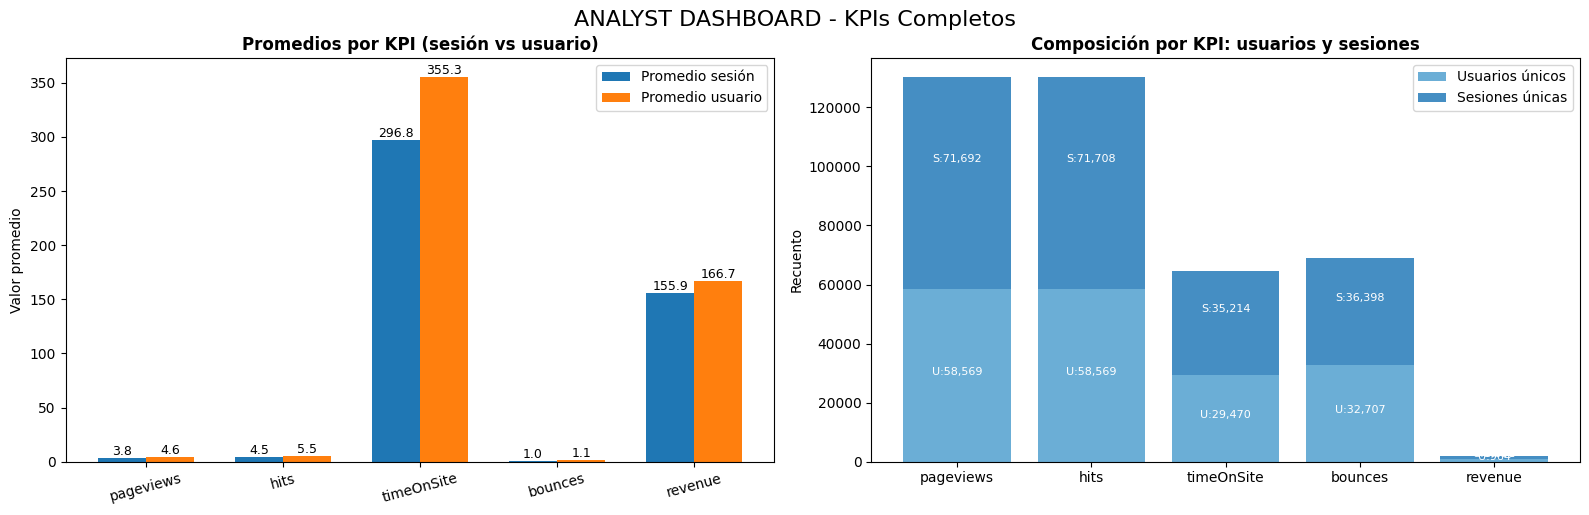


INSIGHTS RÁPIDOS:
• Revenue/Pageview: $0.5941
• Bounce Rate: 13.5%
• Time/Pageview: 38.7s


In [50]:
# Visuales de los principales KPIS
df_kpis = client.query(query_kpis_completa).to_dataframe()

#cabecera
print("\n" + "="*80)
print("📊 DASHBOARD KPIs - GOOGLE ANALYTICS JULIO 2017")
print("="*80)

df_display = df_kpis.copy()
df_display['total'] = df_display['total'].apply(lambda x: f"{x:,.0f}")
df_display['promedio_sesion'] = df_display['promedio_sesion'].apply(lambda x: f"{x:.1f}")
df_display['promedio_usuario'] = df_display['promedio_usuario'].apply(lambda x: f"{x:.1f}")
df_display['sesiones_por_usuario'] = df_display['sesiones_por_usuario'].apply(lambda x: f"{x:.1f}")

print(df_display.to_markdown(index=False))

# Orden KPIS
order = ['pageviews','hits','timeOnSite','bounces','revenue']
df_plot = df_kpis.set_index('name').loc[order].reset_index()

# Configuración plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# 1. BARRAS AGRUPADAS: promedio_sesion vs promedio_usuario
x = np.arange(len(df_plot))
w = 0.35
ax1.bar(x - w/2, df_plot['promedio_sesion'], width=w, label='Promedio sesión', color='#1f77b4')
ax1.bar(x + w/2, df_plot['promedio_usuario'], width=w, label='Promedio usuario', color='#ff7f0e')
ax1.set_xticks(x)
ax1.set_xticklabels(df_plot['name'], rotation=15)
ax1.set_title('Promedios por KPI (sesión vs usuario)', fontweight='bold')
ax1.set_ylabel('Valor promedio')
ax1.legend()
for i,v in enumerate(df_plot['promedio_sesion']):
    ax1.text(i - w/2, v, f'{v:.1f}', ha='center', va='bottom', fontsize=9)
for i,v in enumerate(df_plot['promedio_usuario']):
    ax1.text(i + w/2, v, f'{v:.1f}', ha='center', va='bottom', fontsize=9)

# 2. BARRAS APILADAS: usuarios vs sesiones
ax2.bar(df_plot['name'], df_plot['visitantes_unicos'],
        label='Usuarios únicos', color='#6baed6')
ax2.bar(df_plot['name'], df_plot['sesiones_unicas'],
        bottom=df_plot['visitantes_unicos'],
        label='Sesiones únicas', color='#3182bd', alpha=0.9)
ax2.set_title('Composición por KPI: usuarios y sesiones', fontweight='bold')
ax2.set_ylabel('Recuento')
ax2.legend()
for i,(u,s) in enumerate(zip(df_plot['visitantes_unicos'], df_plot['sesiones_unicas'])):
    ax2.text(i, u/2, f'U:{u:,}', ha='center', color='white', fontsize=8)
    ax2.text(i, u + s*0.6, f'S:{s:,}', ha='center', color='white', fontsize=8)



plt.tight_layout()
plt.suptitle('ANALYST DASHBOARD - KPIs Completos', fontsize=16, y=1.02)
plt.show()

# INSIGHTS
print("\nINSIGHTS RÁPIDOS:")
print(f"• Revenue/Pageview: ${df_kpis[df_kpis['name']=='revenue']['total'].iloc[0]/df_kpis[df_kpis['name']=='pageviews']['total'].iloc[0]:.4f}")
print(f"• Bounce Rate: {df_kpis[df_kpis['name']=='bounces']['total'].iloc[0]/df_kpis[df_kpis['name']=='pageviews']['total'].iloc[0]*100:.1f}%")
print(f"• Time/Pageview: {df_kpis[df_kpis['name']=='timeOnSite']['total'].iloc[0]/df_kpis[df_kpis['name']=='pageviews']['total'].iloc[0]:.1f}s")

Extracción con la dimensión fecha para ver tendencia por día

Datos diarios:         fecha  pageviews   hits  revenue  bounces  timeOnSite
0  2017-07-01       6562   7975   100.54     1190      212509
1  2017-07-02       5637   6618   678.99     1078      192472
2  2017-07-03       6492   7705  1321.42     1142      243603
3  2017-07-04       5740   6661   416.98     1099      208956
4  2017-07-05       9927  11698  8251.53     1487      344221


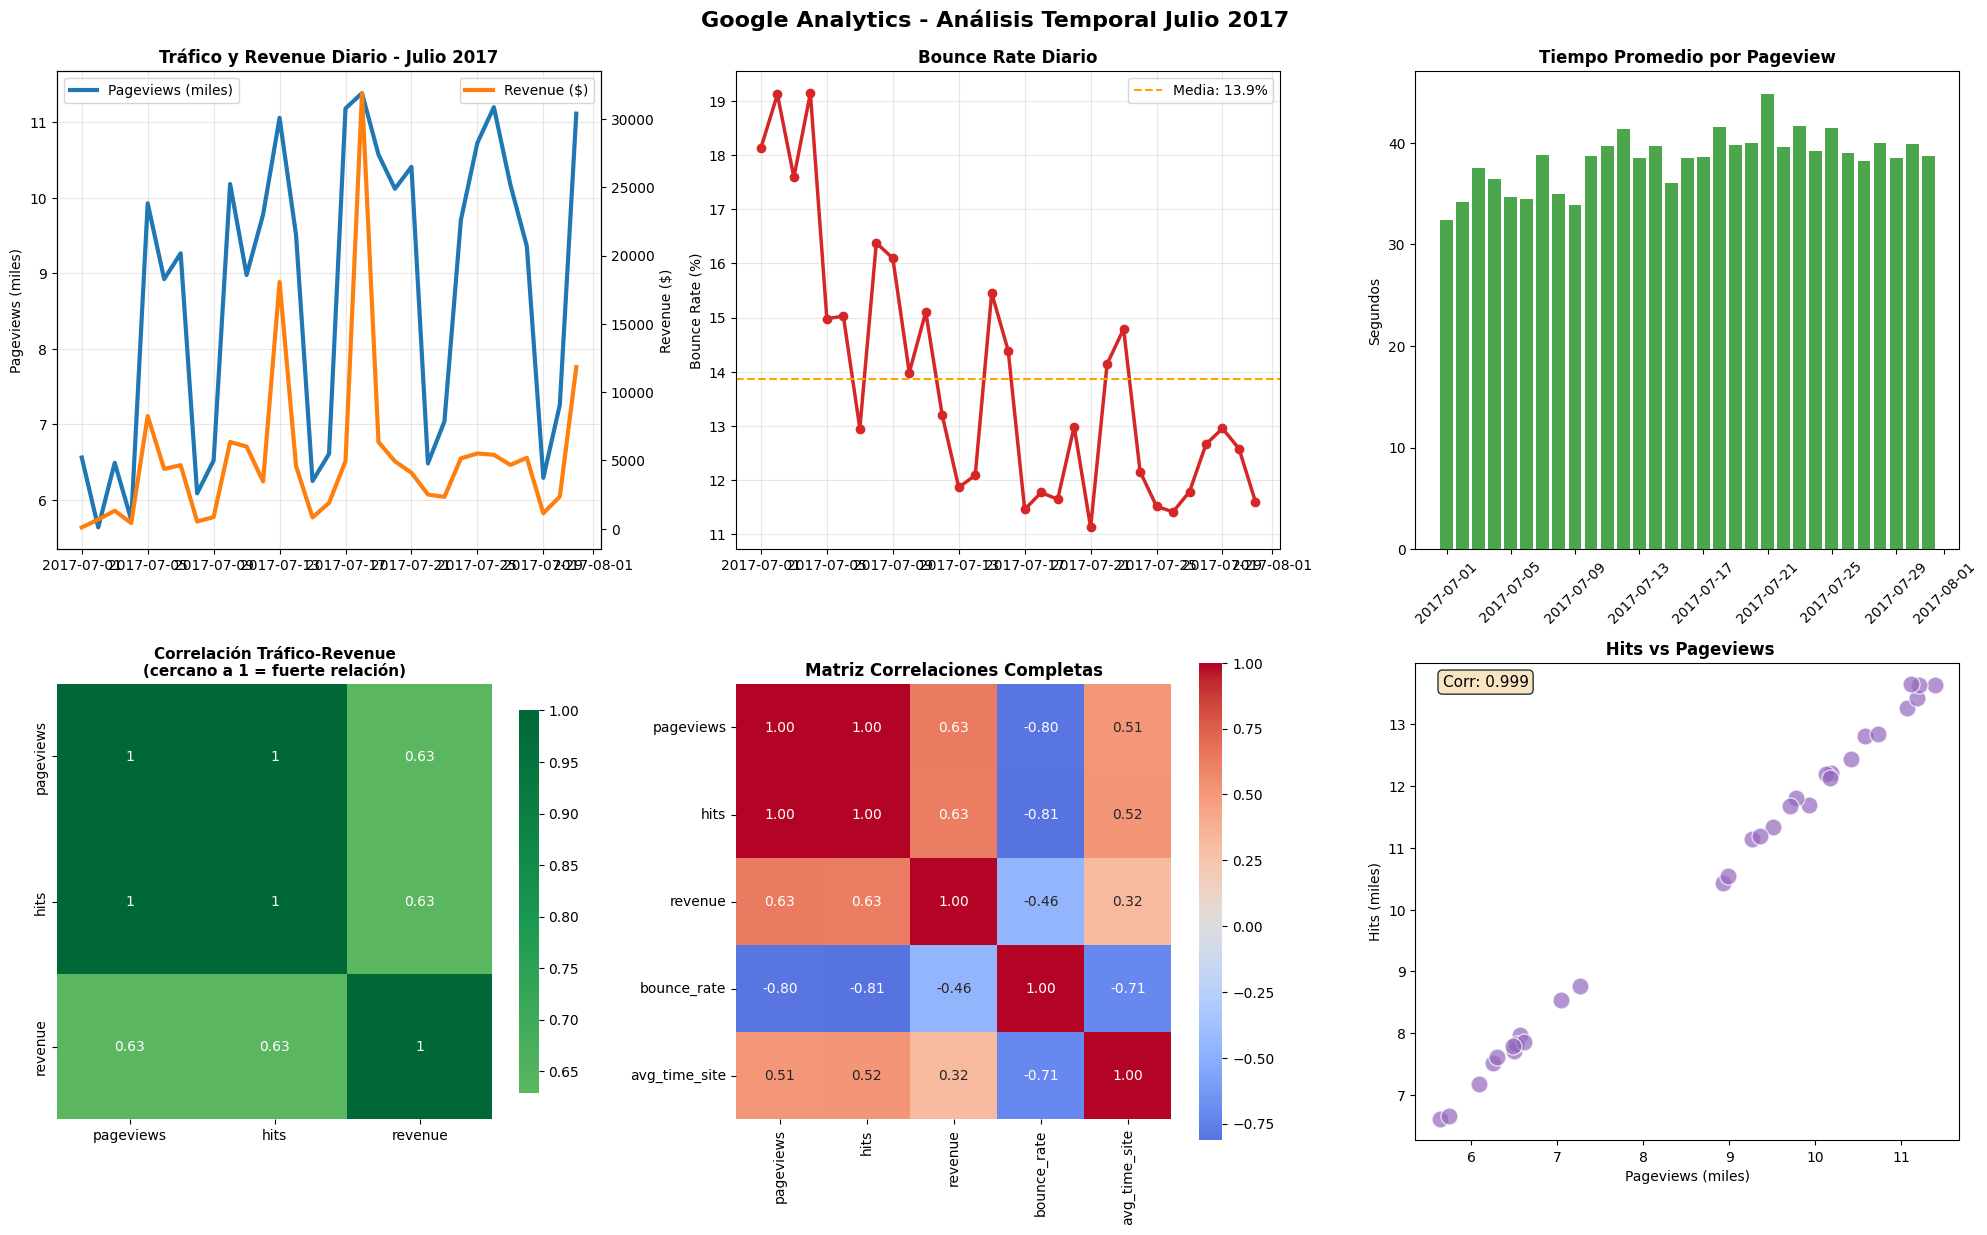

In [51]:

# 1. Detalle por dia
query_temporal = """
SELECT
  PARSE_DATE('%Y%m%d', date) AS fecha,
  SUM(totals.pageviews) AS pageviews,
  SUM(totals.hits) AS hits,
  SUM(SAFE_DIVIDE(totals.totalTransactionRevenue, 1000000)) AS revenue,
  SUM(totals.bounces) AS bounces,
  SUM(totals.timeOnSite) AS timeOnSite
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
WHERE _TABLE_SUFFIX BETWEEN '20170701' AND '20170731'
GROUP BY fecha
ORDER BY fecha
"""
df_temporal = client.query(query_temporal).to_dataframe()
print("Datos diarios:", df_temporal.head())

# 2. Configuración visuales
fig, ((ax1, ax2, ax3), (ax5, ax6, ax4)) = plt.subplots(2, 3, figsize=(20, 12))

# Gráfico 1: Evolución Pageviews + Revenue
ax1.plot(df_temporal['fecha'], df_temporal['pageviews']/1000,
         linewidth=3, label='Pageviews (miles)', color='#1f77b4')
ax1_twin = ax1.twinx()
ax1_twin.plot(df_temporal['fecha'], df_temporal['revenue'],
              linewidth=3, label='Revenue ($)', color='#ff7f0e')
ax1.set_title('Tráfico y Revenue Diario - Julio 2017', fontweight='bold')
ax1.set_ylabel('Pageviews (miles)')
ax1_twin.set_ylabel('Revenue ($)')
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')
ax1.grid(alpha=0.3)

# Gráfico 2: Bounce Rate (bounces/pageviews)
df_temporal['bounce_rate'] = df_temporal['bounces'] / df_temporal['pageviews'] * 100
ax2.plot(df_temporal['fecha'], df_temporal['bounce_rate'],
         marker='o', linewidth=2.5, color='#d62728')
ax2.set_title('Bounce Rate Diario', fontweight='bold')
ax2.set_ylabel('Bounce Rate (%)')
ax2.axhline(y=df_temporal['bounce_rate'].mean(), color='orange',
            linestyle='--', label=f'Media: {df_temporal["bounce_rate"].mean():.1f}%')
ax2.legend()
ax2.grid(alpha=0.3)

# Gráfico 3: Time on Site promedio
df_temporal['avg_time_site'] = df_temporal['timeOnSite'] / df_temporal['pageviews']
ax3.bar(df_temporal['fecha'], df_temporal['avg_time_site'],
        alpha=0.7, color='green')
ax3.set_title('Tiempo Promedio por Pageview', fontweight='bold')
ax3.set_ylabel('Segundos')
ax3.tick_params(axis='x', rotation=45)

# Gráfico 4: Hits vs Pageviews (scatter)
ax4.scatter(df_temporal['pageviews']/1000, df_temporal['hits']/1000,
           s=150, alpha=0.7, color='#9467bd', edgecolors='white', linewidth=1)
ax4.set_xlabel('Pageviews (miles)')
ax4.set_ylabel('Hits (miles)')
ax4.set_title(' Hits vs Pageviews', fontweight='bold', fontsize=12)
corr_hits_pv = df_temporal['pageviews'].corr(df_temporal['hits'])
ax4.text(0.05, 0.95, f'Corr: {corr_hits_pv:.3f}', transform=ax4.transAxes,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8), fontsize=11)
# Gráfico 5: CORRELACIÓN TRÁFICO vs REVENUE
traffic_cols = ['pageviews', 'hits']
revenue_corr = df_temporal[traffic_cols + ['revenue']].corr()
sns.heatmap(revenue_corr, annot=True, cmap='RdYlGn', center=0,
            square=True, ax=ax5, cbar_kws={'shrink': 0.8})
ax5.set_title('Correlación Tráfico-Revenue\n(cercano a 1 = fuerte relación)',
              fontweight='bold', fontsize=11)

# Gráfico 6: Matriz completa correlaciones
corr_matrix = df_temporal[['pageviews', 'hits', 'revenue', 'bounce_rate', 'avg_time_site']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, ax=ax6, fmt='.2f')
ax6.set_title('Matriz Correlaciones Completas', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.suptitle('Google Analytics - Análisis Temporal Julio 2017', fontsize=16, fontweight='bold', y=1.02)
plt.show()



Podemos concluir

*   Hay correlación entre tráfico y ventas en el mes de Julio,

*   La última semana de Julio las visitas no se transforman en venta (posibles causas, fallos en plataforma de pago o stock bajo)

*   El Bounce tambien tiene picos semanales pero se va reduciendo a lo largo del mes


*   El tiempo promedio en visitar la pagina es muy estable


Análisis por Canal y Pais

In [ ]:

# Queries por canal y pais
query_channel = """
SELECT
  channelGrouping AS channel,
  SUM(totals.pageviews) AS pageviews,
  SUM(totals.hits) AS hits,
  SUM(SAFE_DIVIDE(totals.totalTransactionRevenue, 1000000)) AS revenue,
  SUM(totals.bounces) AS bounces,
  COUNT(DISTINCT fullVisitorId) AS unique_users
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
WHERE _TABLE_SUFFIX BETWEEN '20170701' AND '20170731'
GROUP BY channelGrouping
ORDER BY revenue DESC
"""
df_channel = client.query(query_channel).to_dataframe()

query_country = """
SELECT
  geoNetwork.country AS country,
  SUM(totals.pageviews) AS pageviews,
  SUM(totals.hits) AS hits,
  SUM(SAFE_DIVIDE(totals.totalTransactionRevenue, 1000000)) AS revenue,
  SUM(totals.bounces) AS bounces,
  COUNT(DISTINCT fullVisitorId) AS unique_users
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_*`
WHERE _TABLE_SUFFIX BETWEEN '20170701' AND '20170731'
  AND geoNetwork.country != '(not set)'
GROUP BY geoNetwork.country
ORDER BY revenue DESC
LIMIT 15
"""
df_country = client.query(query_country).to_dataframe()


# Limpieza metricas

df_channel = df_channel.dropna(subset=['revenue', 'pageviews', 'unique_users'])
df_channel = df_channel[(df_channel['unique_users'] > 0) & (df_channel['pageviews'] > 0)]

df_country = df_country.dropna(subset=['revenue', 'pageviews', 'unique_users'])
df_country = df_country[(df_country['unique_users'] > 0) & (df_country['pageviews'] > 0)]

# MÉTRICAS BÁSICAS
df_channel['revenue_per_user'] = df_channel['revenue'] / df_channel['unique_users']
df_channel['bounce_rate'] = df_channel['bounces'] / df_channel['pageviews'] * 100
df_country['revenue_per_user'] = df_country['revenue'] / df_country['unique_users']
df_country['bounce_rate'] = df_country['bounces'] / df_country['pageviews'] * 100

# MÉTRICAS NUEVAS PARA PAÍSES
df_country['conversion_rate'] = (df_country['revenue'] / df_country['pageviews']) * 1000  # por 1000 pv
df_country['pageviews_per_user'] = df_country['pageviews'] / df_country['unique_users']

print("Agrupado por canal")
print(df_channel.round(2)[['channel', 'revenue', 'revenue_per_user', 'bounce_rate']].to_string(index=False))
print("\n🌍 TOP paises ")
print(df_country.head(10).round(2)[['country', 'revenue', 'revenue_per_user', 'bounce_rate', 'conversion_rate']].to_string(index=False))


# Configuración visuales
fig, ( (ax3, ax4), (ax5, ax6)) = plt.subplots(2, 2, figsize=(16, 18))


# 3. Revenue/User por Canal
top_channels = df_channel.head(6)
x_pos = np.arange(len(top_channels))
colors_channel = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
ax3.bar(x_pos, top_channels['revenue_per_user'], color=colors_channel, alpha=0.8)
ax3.set_title('Revenue por Usuario/Channel', fontweight='bold')
ax3.set_ylabel('Revenue/User ($)')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(top_channels['channel'], rotation=45, ha='right')
for i, v in enumerate(top_channels['revenue_per_user']):
    ax3.text(i, v + max(top_channels['revenue_per_user'])*0.01, f'${v:.2f}', ha='center', fontsize=9)

# 4. TOP Revenue/User Países
top_rev_user = df_country.nlargest(8, 'revenue_per_user')
ax4.barh(range(len(top_rev_user)), top_rev_user['revenue_per_user'], color='#2ca02c', alpha=0.8)
ax4.set_title('MEJOR Revenue/User por País', fontweight='bold')
ax4.set_xlabel('Revenue/User ($)')
ax4.set_yticks(range(len(top_rev_user)))
ax4.set_yticklabels(top_rev_user['country'])
for i, v in enumerate(top_rev_user['revenue_per_user']):
    ax4.text(v + max(top_rev_user['revenue_per_user'])*0.02, i, f'${v:.2f}', va='center')

# 5. Heatmap correlaciones (solo columnas existentes)
country_cols = ['revenue', 'revenue_per_user', 'bounce_rate', 'conversion_rate', 'pageviews_per_user']
country_corr = df_country[country_cols].corr()
sns.heatmap(country_corr, annot=True, cmap='RdYlGn', center=0, ax=ax5,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
ax5.set_title('Matriz Correlaciones País', fontweight='bold')

# 6. Channel Revenue TOP (pie chart)
top5_channels_rev = df_channel.head(5)['revenue']
ax6.pie(top5_channels_rev.values, labels=top5_channels_rev.index, autopct='%1.1f%%',
        colors=colors_channel[:5], startangle=90)
ax6.set_title('Distribución Revenue por Channel', fontweight='bold')

plt.tight_layout()
plt.suptitle('Google Analytics Julio 2017 - Análisis Canal y Pais',
             fontsize=16, fontweight='bold', y=1.02)
plt.show()


# INSIGHTS

print("\n" + "="*80)
print("🎯 INSIGHTS CANAL + PAIS")
print("="*80)
print(f"🏆 Channel #1: {df_channel.iloc[0]['channel']} (${df_channel.iloc[0]['revenue']:,.0f})")
print(f"👤 Mejor Rev/User Channel: {df_channel.loc[df_channel['revenue_per_user'].idxmax(), 'channel']} (${df_channel['revenue_per_user'].max():.2f})")
print(f"🌍 País #1: {df_country.iloc[0]['country']} (${df_country.iloc[0]['revenue']:,.0f})")
print(f"💰 Mejor Rev/User País: {df_country.loc[df_country['revenue_per_user'].idxmax(), 'country']} (${df_country['revenue_per_user'].max():.2f})")
print(f"⚡ Mejor Conversion: {df_country.loc[df_country['conversion_rate'].idxmax(), 'country']} ({df_country['conversion_rate'].max():.1f}/1000pv)")
print(f"📉 Corr Bounce↔Revenue: {df_country['bounce_rate'].corr(df_country['revenue']):.3f}")


